<a href="https://colab.research.google.com/github/HarshaLokesh/IOT_water_quality_device/blob/main/Algae_bloom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving waterData.csv to waterData.csv


In [3]:
import pandas as pd
data0 = pd.read_csv("waterData.csv")
data0

,temp c,spcond (ms/cm),ph,do (%),turbidity (fnu),phycocyanin (rfu)
0,26.92,2.12,8.61,113.2,6.39,2.12
1,27.07,2.12,8.59,116.3,6.82,2.19
2,27.13,2.12,8.61,119.1,7.17,2.39
3,27.37,2.12,8.65,122.3,7.04,1.60
4,27.47,2.12,8.69,123.6,7.08,2.56
...,...,...,...,...,...,...
7089,14.32,3.61,8.39,108.2,2.37,0.43
7090,14.31,3.60,8.38,107.7,2.22,0.44
7091,14.30,3.60,8.40,108.4,2.11,0.44
7092,14.30,3.60,8.39,107.9,2.27,0.40


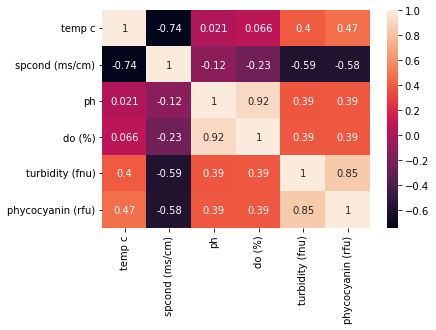

In [4]:
import seaborn as sns

import matplotlib.pyplot as plt

df_small = data0.iloc[:,:7]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [5]:
df = pd.DataFrame(data0)
X=data0.drop('phycocyanin (rfu)',axis=1).values   
y=data0['phycocyanin (rfu)'].values

X,y


(array([[ 26.92,   2.12,   8.61, 113.2 ,   6.39],
        [ 27.07,   2.12,   8.59, 116.3 ,   6.82],
        [ 27.13,   2.12,   8.61, 119.1 ,   7.17],
        ...,
        [ 14.3 ,   3.6 ,   8.4 , 108.4 ,   2.11],
        [ 14.3 ,   3.6 ,   8.39, 107.9 ,   2.27],
        [ 14.29,   3.6 ,   8.39, 108.1 ,   2.3 ]]),
 array([2.12, 2.19, 2.39, ..., 0.44, 0.4 , 0.42]))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (5675, 5) (5675,)
Test set: (1419, 5) (1419,)


Maximum accuracy:- 0.9353286805693809 at K = 4


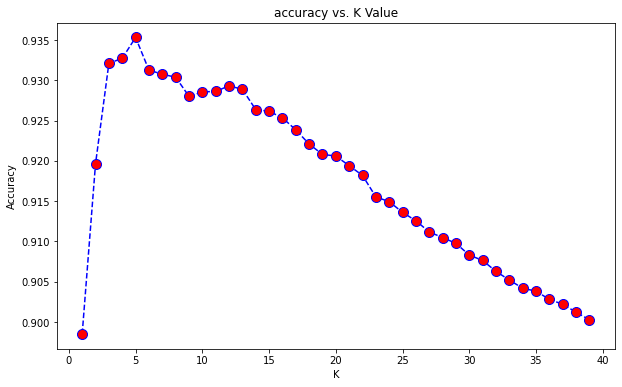

In [7]:
from sklearn.neighbors import KNeighborsRegressor
acc=[]

for i in range(1,40):
    neigh = KNeighborsRegressor(n_neighbors = i).fit(X_train,y_train)
    
    acc.append(neigh.score(X_test, y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [8]:
knn = KNeighborsRegressor(n_neighbors = 4).fit(X_train,y_train)
a = np.array([27.47, 	2.12, 	8.69, 	123.6, 	7.08])

pre = knn.predict(a.reshape(1,-1))
print('accurary score: ', knn.score(X_test, y_test))
print('prediction for input:',pre)

accurary score:  0.9327378646567137
prediction for input: [2.6375]


In [28]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
make_regression(n_features=5, n_informative=2,random_state=0, shuffle=False)
ada_clf = AdaBoostRegressor(random_state=3, n_estimators=100,learning_rate=1)
ada_clf.fit(X_train, y_train)


print('Accuracy score: ', ada_clf.score(X_test,y_test))
a = np.array([27.47, 	2.12, 	8.69, 	123.6, 	7.08])
pre = ada_clf.predict(a.reshape(1,-1))
print('prediction for input:',pre)

Accuracy score:  0.88054615950708
prediction for input: [2.57602804]
